In [1]:
import sys
import os
import numpy as np
%matplotlib inline
import xgboost as xgb
import simplejson

# Usage

In [ ]:
"""
1. type "jupyter notebook --no-browser --port 8080 --ip=*" in commandline
2. It will show one line 
http://localhost:8080/?token=x
3. copy the string x after token
4. open the notebook in browse with 
http://dev-username.ec2.pin220.com:8080/?token=x
Remember to replace username with your own username, and x with the token string
"""

# Common Functions for Model Training and Analysis

In [2]:
def train(param, matrices, test, num_round):
    evallist  = [(test,'eval'), (matrices,'train')]
    booster_tree = xgb.train(param, matrices, num_round, evallist, callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
    return booster_tree

In [3]:
def compute_feat_imp(booster_tree):
    importance = booster_tree.get_score(importance_type='gain')
    return importance
 

In [4]:
def plot_tree(booster_tree):
    graph = xgb.to_graphviz(booster_tree, fmap='pinFeatureMap.txt')
    graph.render()

In [5]:
def save_model(booster_tree):
    base_dict = {
        "country": 'US'
    }
    base_dict["country"] = 'US'
    base_dict["gender"] = 'ALL'
    base_dict["locale"] = 'ALL'
    base_dict["type"] = 1
    base_dict["model_params"] = {
                "ITERATION_SHRINKAGE": 1.0,
            }
    model = booster_tree.get_dump()
    model_list = []
    for tree in model:
        sublist = []
        sublist.append(tree)
        model_list.append(sublist)
    base_dict["model"] = model_list
    simplejson.dump(base_dict, open('model.json', 'w'))

# Option 1: Train Model in Python

In [6]:
# Load Training Data
data_file = '' # specify the data file name
group_file = '' # specify the data group file name
group =np.loadtxt(group_file)
group = group.astype(int)
matrices = xgb.DMatrix(data_file)
matrices.set_group(group)

In [7]:
# Load Test Data
test_file = '' # specify the test file name
test_group_file = '' # specify the test group file name
test_group =np.loadtxt(test_group_file)
test_group = test_group.astype(int)
test = xgb.DMatrix(test_file)
test.set_group(test_group)

In [8]:
# Model Training
num_round = 10
param = {
        'objective':'rank:ndcg',
        'booster' : 'gbtree',
        'eta' : 1.0,
        'max_depth' : 6,
        'num_parallel_tree' : 1,
        'min_child_weight' : 0.1,
        'gamma' : 0.5,
        'max_delta_step':1,
        'eval_metric': ['ndcg@5']
    }
bst = train(param, matrices, test, num_round)

[0]	eval-ndcg@5:0.48041	train-ndcg@5:0.282544
[0]	eval-ndcg@5:0.48041	train-ndcg@5:0.282544
[1]	eval-ndcg@5:0.493923	train-ndcg@5:0.291036
[1]	eval-ndcg@5:0.493923	train-ndcg@5:0.291036
[2]	eval-ndcg@5:0.56263	train-ndcg@5:0.295791
[2]	eval-ndcg@5:0.56263	train-ndcg@5:0.295791
[3]	eval-ndcg@5:0.609174	train-ndcg@5:0.298693
[3]	eval-ndcg@5:0.609174	train-ndcg@5:0.298693
[4]	eval-ndcg@5:0.62525	train-ndcg@5:0.301063
[4]	eval-ndcg@5:0.62525	train-ndcg@5:0.301063
[5]	eval-ndcg@5:0.642748	train-ndcg@5:0.303525
[5]	eval-ndcg@5:0.642748	train-ndcg@5:0.303525
[6]	eval-ndcg@5:0.654314	train-ndcg@5:0.305214
[6]	eval-ndcg@5:0.654314	train-ndcg@5:0.305214
[7]	eval-ndcg@5:0.655818	train-ndcg@5:0.307364
[7]	eval-ndcg@5:0.655818	train-ndcg@5:0.307364
[8]	eval-ndcg@5:0.661913	train-ndcg@5:0.309359
[8]	eval-ndcg@5:0.661913	train-ndcg@5:0.309359
[9]	eval-ndcg@5:0.668156	train-ndcg@5:0.311738
[9]	eval-ndcg@5:0.668156	train-ndcg@5:0.311738


# Option 2: Train Model in Command Line and Load Model

In [9]:
"""
Load Pre-trained Model using Command Line 
"""
model_filename = ""
bst = xgb.Booster(model_file=model_filename)

# Save and Analyze Model

In [10]:
# save model
save_model(bst)

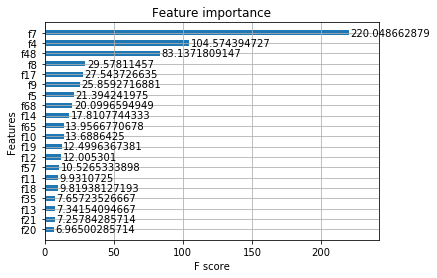

In [11]:
"""
Analyze the importance of features
"""
importance = compute_feat_imp(bst)
ax = xgb.plot_importance(bst, importance_type='gain', height=0.5, max_num_features=20)

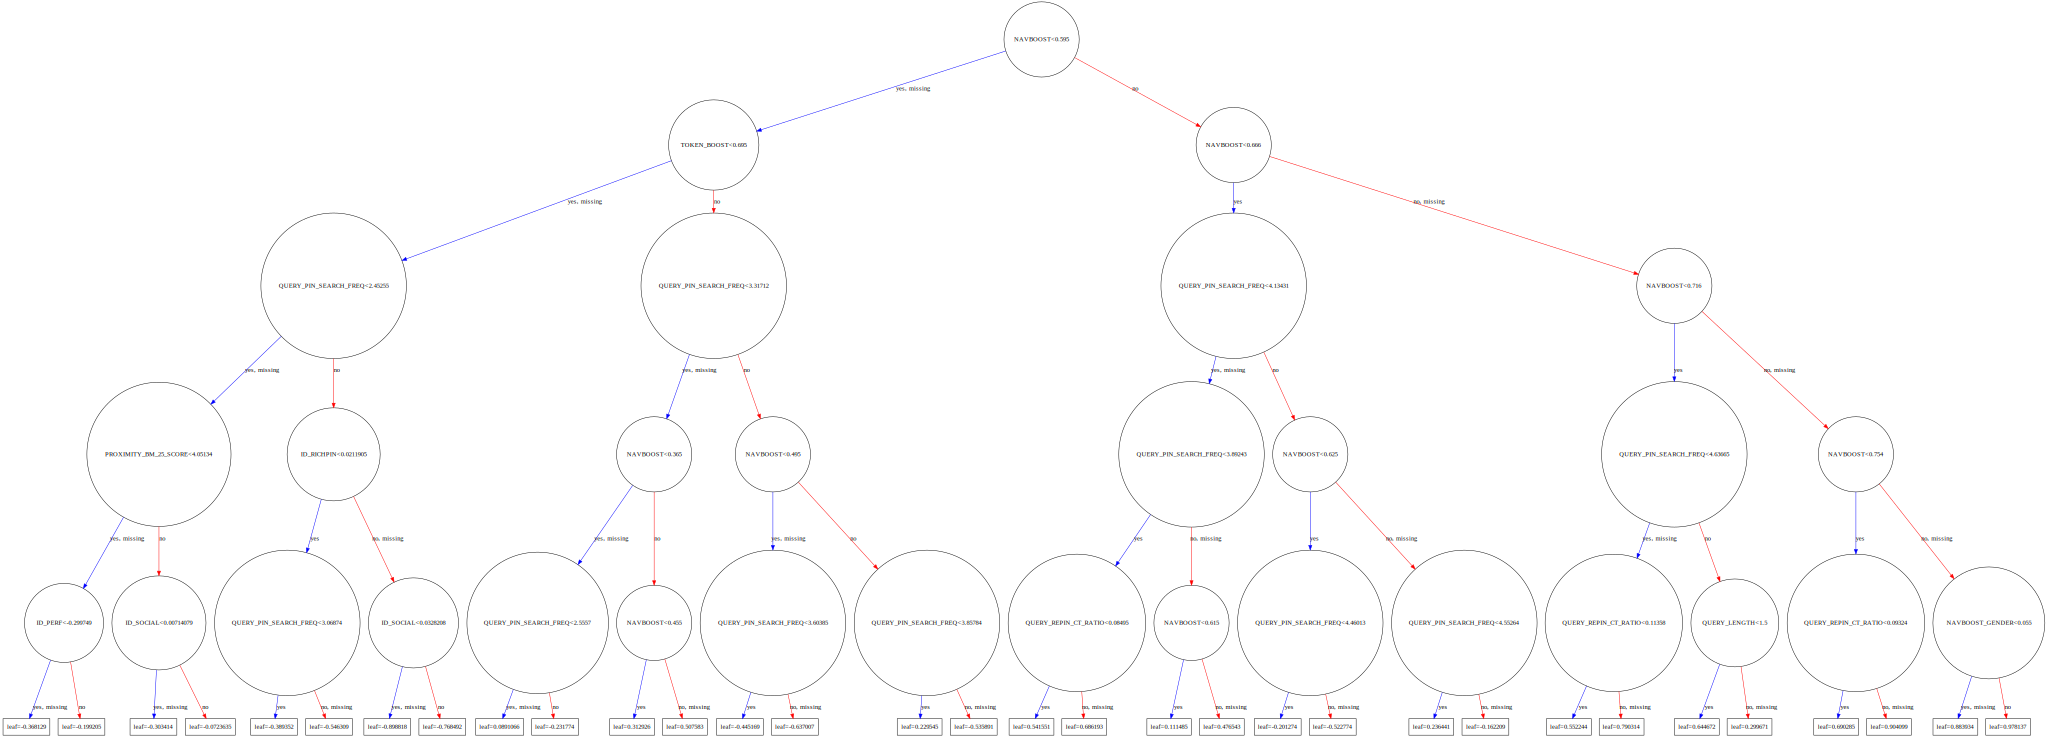

In [13]:
"""
Plot the trees
"""
xgb.to_graphviz(bst, fmap='pinFeatureMap.txt', num_trees=0)